## Note
It's not the example of usage, just me trying to make something intresting with the data (failed in this version).

## IDEA
Would be nice to find how good one hero works in combination with another. I thought it is possible to count such metric by doing the following:
1. Get matches ids (for a patch, a year or any period)
2. For all the ids create 2 vectors, representing a team (with help of Match class). Vector contain ids and result.
3. Create an adjacency matrix C of the size (n_heroes X n_heroes)
4. Go through all the vectors creted on the step 2 and
    - add some small weight to the C\[i\][j] where i and j are heroes ids if the combination won. Do so for all posible combinations
    - subtract the same small weight if a team lost

In [1]:
import json
import numpy as np
import networkx as nx
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# I extracted picks and result from huge dumb of matches
with open('../atod/data/picks.json', 'r') as fp:
    matches = json.load(fp)
    
print(len(matches))

97216


In [3]:
n_heroes = 115
C = [[0 for _ in range(n_heroes)] for _ in range(n_heroes)]
# the "small wright" what would be added and subtracted
w = 1 / len(matches)

In [4]:
def add_weight(C, heroes, w):
    done = False
    for i, hero1 in enumerate(heroes):
        for hero2 in heroes[i+1:]:
            C[hero1][hero2] += w
            C[hero2][hero1] += w

In [5]:
for match_id, match in matches.items():
    if not isinstance(match, dict):
        continue
    # get winner side id. Radiant is 0, Dire is 1
    winner = 0 if match['radiant_win'] else 1
    # add w to all the pairs of winner heroes
    add_weight(C, match[str(winner)], w)
    # subtract from all the loser pairs w
    add_weight(C, match[str(abs(winner-1))], -w)

In [6]:
heroes_connections = np.array(C)
heroes_graph = nx.from_numpy_matrix(heroes_connections)
# heroes_connections = heroes_connections[1:,1:] + heroes_connections.min()
positive_edges = [(u, v) for u, v, d in 
                  heroes_graph.edges(data=True) if d['weight'] >0]

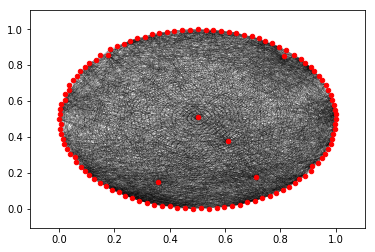

In [7]:
pos=nx.spring_layout(heroes_graph)

nx.draw_networkx_nodes(heroes_graph, pos, node_size=20)
nx.draw_networkx_edges(heroes_graph, pos, edgelist=positive_edges, 
                       width=.1)
# matplotlib.rcParams['figure.figsize'] = (18, 16)
plt.show()